In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from scipy.signal import find_peaks, peak_widths
import astropy.units as u
import numpy as np
import pandas as pd
from collections import defaultdict

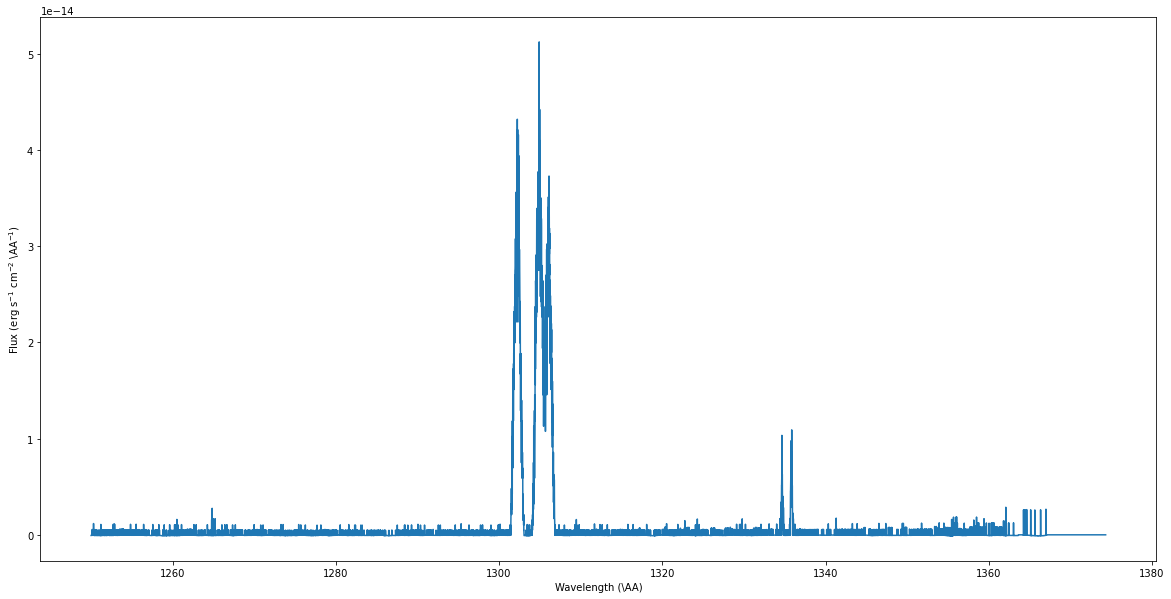

In [5]:
# data sets: (note: og is 27040)
data = fits.getdata('leoo06010_x1dsum.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = w > 1250
plt.figure(figsize=(20,10))

plt.plot(w[mask], f[mask])


plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.show()

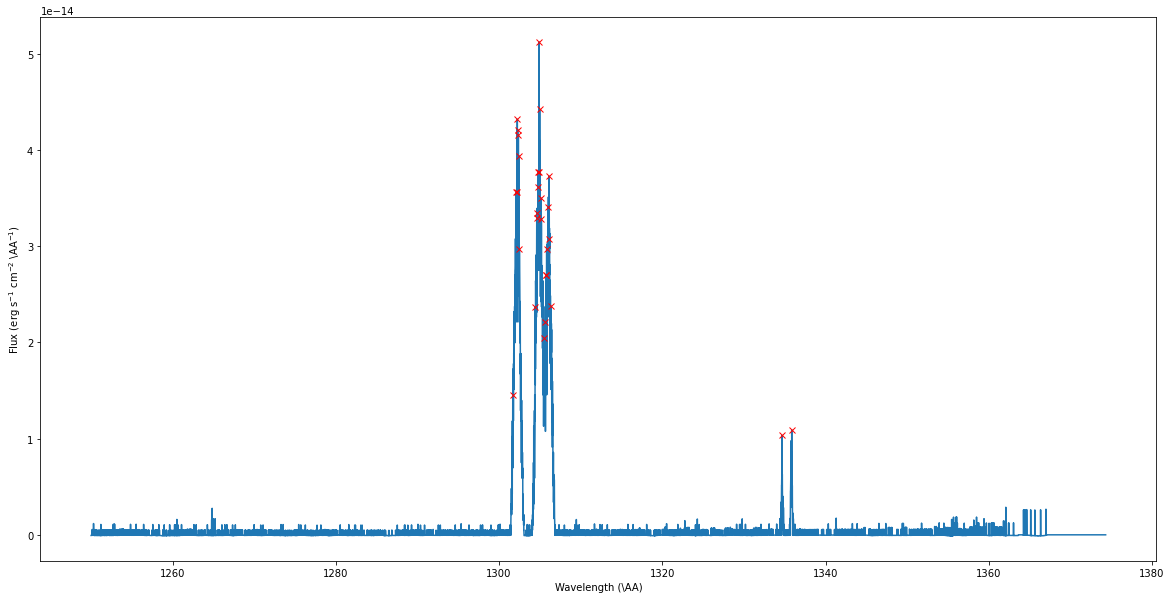

Peak 0: 1301.675340007123
Peak 1: 1302.1137051226515
Peak 2: 1302.1435936532557
Peak 3: 1302.2332592450682
Peak 4: 1302.2731106192073
Peak 5: 1302.3627762110198
Peak 6: 1302.4125904286934
Peak 7: 1302.4922931769713
Peak 8: 1304.42508482271
Peak 9: 1304.61437884987
Peak 10: 1304.654230224009
Peak 11: 1304.763821502891
Peak 12: 1304.80367287703
Peak 13: 1304.8534870947037
Peak 14: 1304.9132641559122
Peak 15: 1304.9730412171205
Peak 16: 1305.1125210266068
Peak 17: 1305.18226093135
Peak 18: 1305.5110347679963
Peak 19: 1305.630588890413
Peak 20: 1305.7302173257603
Peak 21: 1305.7999572305037
Peak 22: 1305.8298457611077
Peak 23: 1306.009176944733
Peak 24: 1306.0689540059414
Peak 25: 1306.118768223615
Peak 26: 1306.3678393119835
Peak 27: 1334.6523521070976
Peak 28: 1335.8578561748006


In [23]:
# Find peaks
peaks, properties  = find_peaks(f[mask], height = 10*sum(f[mask])/len(f[mask]), prominence = 10*sum(f[mask])/len(f[mask]), width = 0, threshold = (1/20)*sum(f[mask])/len(f[mask]))
plt.figure(figsize=(20,10))
plt.plot(w[mask], f[mask])
plt.plot(w[mask][peaks], f[mask][peaks], "xr")
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.show()

# All peaks!
count = 0
for peak in w[mask][peaks]:
    print(f"Peak {count}: {peak}")
    count+=1

In [9]:
# Get rest data
data = pd.read_csv("../DEM_goodlinelist .csv")
df = pd.DataFrame(data)
print(df)

       Ion  Wavelength Likelihood to measure  Log Formation Temperature
0     S VI     933.397                Medium                        5.3
1    N III     989.787                Medium                        4.9
2    N III     991.495                Medium                        4.9
3    N III     991.564                Medium                        4.9
4    Ne VI     999.182                Medium                        5.6
5     O VI    1032.914                Medium                        5.5
6     O VI    1037.615                Medium                        5.5
7   Fe XIX    1118.057                   Low                        6.9
8     Ne V    1145.596                Medium                        5.5
9    C III    1174.935                  High                        4.9
10   C III    1175.265                  High                        4.9
11   C III    1175.592                  High                        4.9
12   C III    1175.713                  High                    

(1330.0, 1350.0)

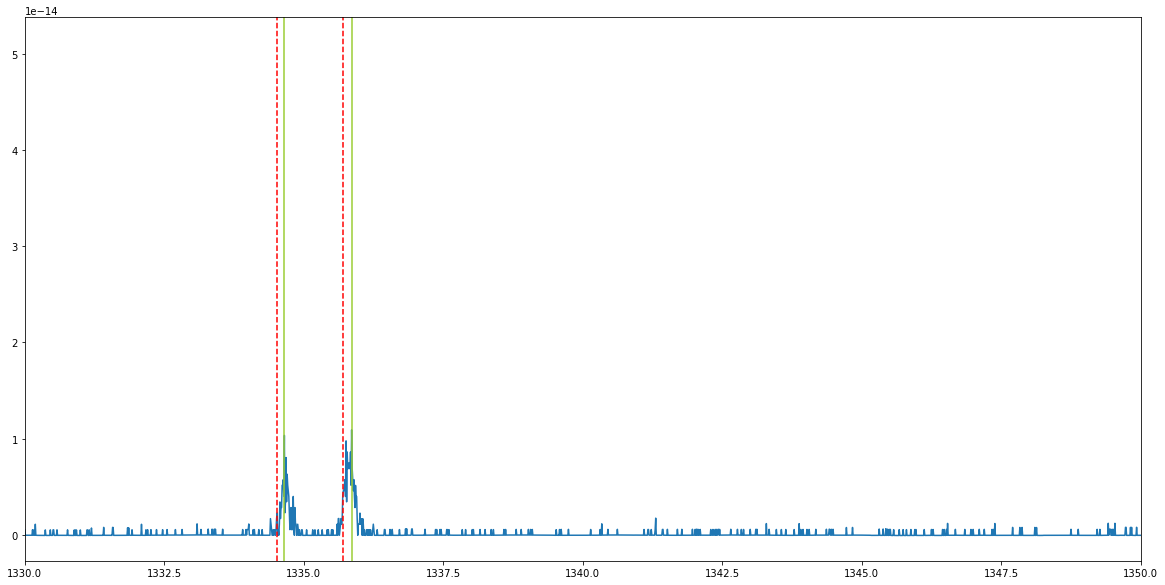

In [22]:
# mask = w > 1250
fig, ax = plt.subplots()
ax.plot(w[mask], f[mask])
fig.set_figheight(10)
fig.set_figwidth(20) 

for line in df['Wavelength']:
    if(line > 1220):
        plt.axvline(x = line, color = 'red', label = 'axvline - full height', linestyle = "--")
    
for peak in w[mask][peaks]:
    plt.axvline(x = peak, color = 'yellowgreen', label = 'axvline - full height')

plt.xlim([1330, 1350]) # add +60

Observed and rest wavelength for calculations

1334.6523521070976 1334.524 

1335.8578561748006 1335.709 

In [24]:
rest_lam = [1334.524, 1335.709]
obs_lam = [1334.6523521070976, 1335.8578561748006]
assert len(rest_lam)==len(obs_lam)

In [31]:
dv = []

# Combine the first two since they are close!
for i in range(0, 2):
    u_rest_lam = rest_lam[i] * u.AA
    u_obs_lam = obs_lam[i] * u.AA
    dv.append(u_obs_lam.to(u.km/u.s,  equivalencies=u.doppler_optical(u_rest_lam)))

dv_average = sum(dv)/(len(dv))
print(f"Avg Doppler Shift: {dv_average}")

Avg Doppler Shift: 31.12171884073826 km / s
